0
xCoord= 338 
yCoord= 211 
radius= 505


(338, 211, 505)

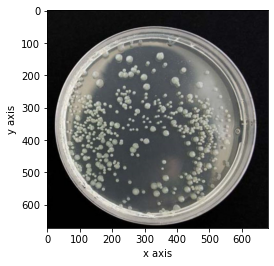

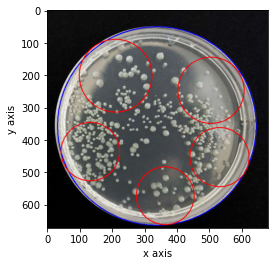

In [4]:
import detObjFunc as RV
orImage=RV.loadImage("petriDish_test.jpg")
def getPetriDish(iImage):
    import cv2
    import matplotlib.pyplot as plt
    import detObjFunc as RV
    from PIL import Image
    import numpy as np
    #var init
    draw=1
    minR=200
    #load and grayscale
    
    grImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY)
    if draw:
        RV.showImage(iImage,"Original Image")
        #RV.showImage(grImage,"Gray Image")

    #hough circles
    foundVar=cv2.HoughCircles(grImage,cv2.HOUGH_GRADIENT,1.2,minR)

    if foundVar is not None:
        foundVar=np.round(foundVar[0,:]).astype("int")
    drImage=iImage
    rMax=np.max(foundVar,axis=0)[2]
    i=0;
    iMax=-1
    for (x,y,r) in foundVar:
        if r==rMax:
            iMax=i;
            drImage=cv2.circle(drImage,(x,y),r,(0,0,255),2)
        else:
            drImage=cv2.circle(drImage,(x,y),r,(255,0,0),2)
        i=i+1
    if draw:
        RV.showImage(drImage,"Found circles")
        print(iMax)
        print("xCoord= "+str(foundVar[0,iMax])+" \nyCoord= "+str(foundVar[1,iMax])+" \nradius= "+str(foundVar[2,iMax]))
    return (foundVar[0,iMax],foundVar[1,iMax],foundVar[2,iMax])
getPetriDish(orImage)

In [22]:
print(foundVar)
print(np.max(foundVar,axis=0)[2])

[[338 357 306]
 [211 202 112]
 [505 247 102]
 [133 436  90]
 [531 453  91]
 [364 572  89]]
306
